In [143]:
import numpy as np
import pandas as pd

import pmdarima as pm
from statsmodels.tsa.api import ExponentialSmoothing
#from neuralprophet import NeuralProphet

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, PowerTransformer
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Statistics
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from pmdarima import auto_arima

# Graph
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import pandas_datareader as pdr
import datetime

from bs4 import BeautifulSoup

import sys
import quandl
import logging

from fredapi import Fred
fred = Fred(api_key='c0a3f23bdd23a65e6546b6d0e5f4d4a5')


sk.set_config(display='diagram')


# Warnings
import warnings
#warnings.filterwarnings('ignore')

# Loggers
import logging
logging.getLogger().setLevel(logging.ERROR)

# Functions

# Load Data

In [144]:
#  Set start date
start_date = datetime.date(2010, 1, 1)
start_date_str = datetime.datetime.strftime(start_date, "%Y-%m-%d")

#  Federal Reserve Economic Data Service
data_source = 'fred'
treasury_yield_code = 'DGS10' #  10-year Treasury Rate
unemployment_rate_code = 'UNRATE'
gdp_code = 'GDPC1'
mortgage_code = 'MORTGAGE30US'
snp_code = 'SP500'
personal_savings_rate_code = 'PSAVERT'
cpi_series = 'CPIAUCSL'
ff_rate_code = 'EFFR'

#  Fetch data
treasury_yield_df = pdr.DataReader(treasury_yield_code, data_source, start_date)
unemployment_rate_df = pdr.DataReader(unemployment_rate_code, data_source, start_date)
mortgate_data_df = pdr.DataReader(mortgage_code, data_source, start_date)
snp_data_df = pdr.DataReader(snp_code, data_source, start_date)
savings_df = pdr.DataReader(personal_savings_rate_code, data_source, start_date)
cpi_df = pdr.DataReader(cpi_series, data_source, start_date)
ff_rate_df = pdr.DataReader(ff_rate_code, data_source, start_date)

## Create DataFrame

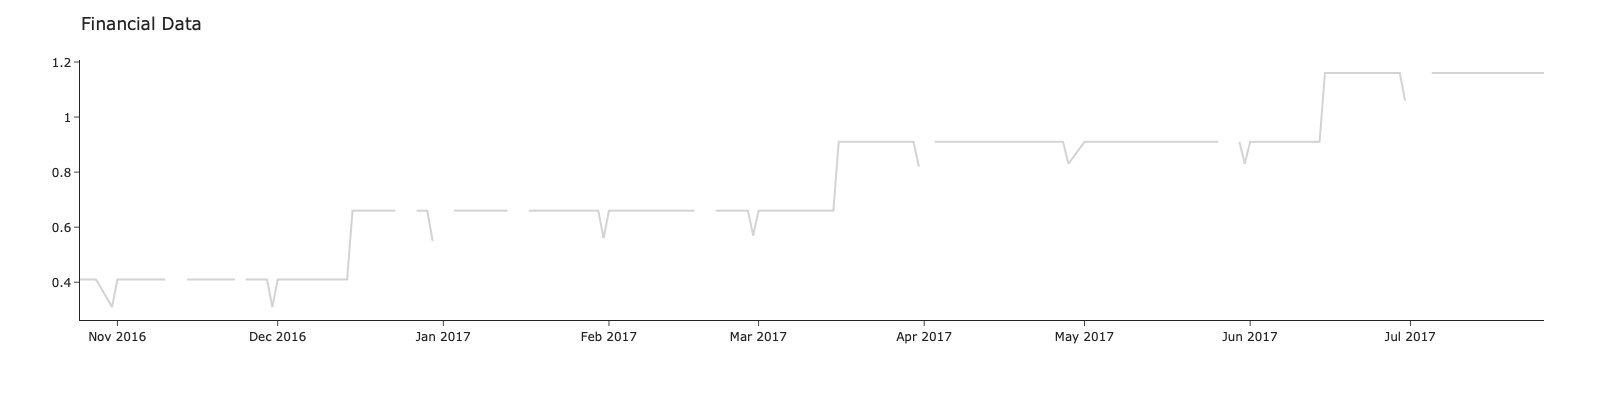

In [145]:
df = pd.concat([treasury_yield_df,mortgate_data_df,snp_data_df,savings_df,unemployment_rate_df,cpi_df, ff_rate_df], axis=1)
df.sort_index(inplace=True)

t_df = df.iloc[1800:2000]
fig = px.line(height=400)
fig.add_scatter(y=t_df['EFFR'], x=t_df.index,
                marker=dict(size=20, color="lightgray"), name='actual')
fig.update_layout(template="simple_white", title="Financial Data")
fig.show()

In [146]:
t_df.head(40)

,DGS10,MORTGAGE30US,SP500,PSAVERT,UNRATE,CPIAUCSL,EFFR
DATE,,,,,,,
2016-10-25,1.77,NaN,2143.16,NaN,NaN,NaN,0.41
2016-10-26,1.79,NaN,2139.43,NaN,NaN,NaN,0.41
2016-10-27,1.85,3.47,2133.04,NaN,NaN,NaN,0.41
2016-10-28,1.86,NaN,2126.41,NaN,NaN,NaN,0.41
2016-10-31,1.84,NaN,2126.15,NaN,NaN,NaN,0.31
2016-11-01,1.83,NaN,2111.72,7.0,4.7,242.026,0.41
2016-11-02,1.81,NaN,2097.94,NaN,NaN,NaN,0.41
2016-11-03,1.82,3.54,2088.66,NaN,NaN,NaN,0.41
2016-11-04,1.79,NaN,2085.18,NaN,NaN,NaN,0.41


In [147]:
df = pd.concat([treasury_yield_df,mortgate_data_df,snp_data_df,savings_df,unemployment_rate_df,cpi_df, ff_rate_df], axis=1)
#df = df.asfreq('1D', how='start', method='ffill', fill_value=0)
df = df.asfreq('MS', how='start', method='ffill', fill_value=0)
df.sort_index(inplace=True)
df

,DGS10,MORTGAGE30US,SP500,PSAVERT,UNRATE,CPIAUCSL,EFFR
DATE,,,,,,,
2010-01-01,NaN,NaN,NaN,5.9,9.8,217.488,NaN
2010-02-01,3.68,NaN,NaN,5.6,9.8,217.281,0.14
2010-03-01,3.61,NaN,NaN,5.6,9.9,217.353,0.14
2010-04-01,3.89,5.08,NaN,6.2,9.9,217.403,0.17
2010-05-01,NaN,NaN,NaN,6.7,9.6,217.290,NaN
...,...,...,...,...,...,...,...
2023-03-01,4.01,NaN,3951.39,4.6,3.5,301.808,4.58
2023-04-01,NaN,NaN,NaN,4.3,3.4,302.918,NaN
2023-05-01,3.59,NaN,4167.87,4.6,3.7,303.294,4.83


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2010-01-01 to 2023-07-01
Freq: MS
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DGS10         108 non-null    float64
 1   MORTGAGE30US  22 non-null     float64
 2   SP500         78 non-null     float64
 3   PSAVERT       161 non-null    float64
 4   UNRATE        162 non-null    float64
 5   CPIAUCSL      162 non-null    float64
 6   EFFR          108 non-null    float64
dtypes: float64(7)
memory usage: 10.2 KB


In [149]:
df.isnull().sum() / len(df)

DGS10           0.337423
MORTGAGE30US    0.865031
SP500           0.521472
PSAVERT         0.012270
UNRATE          0.006135
CPIAUCSL        0.006135
EFFR            0.337423
dtype: float64

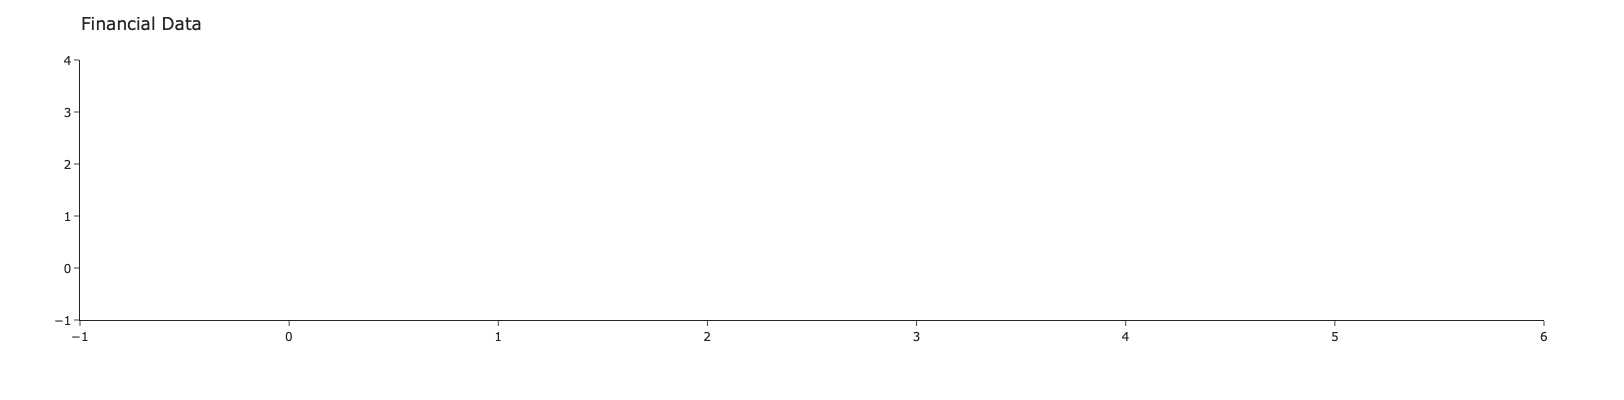

In [150]:
t_df = df.iloc[1000:2000]
fig = px.line(height=400)
fig.add_scatter(y=t_df['EFFR'], x=t_df.index,
                marker=dict(size=20, color="lightgray"), name='actual')
fig.update_layout(template="simple_white", title="Financial Data")
fig.show()

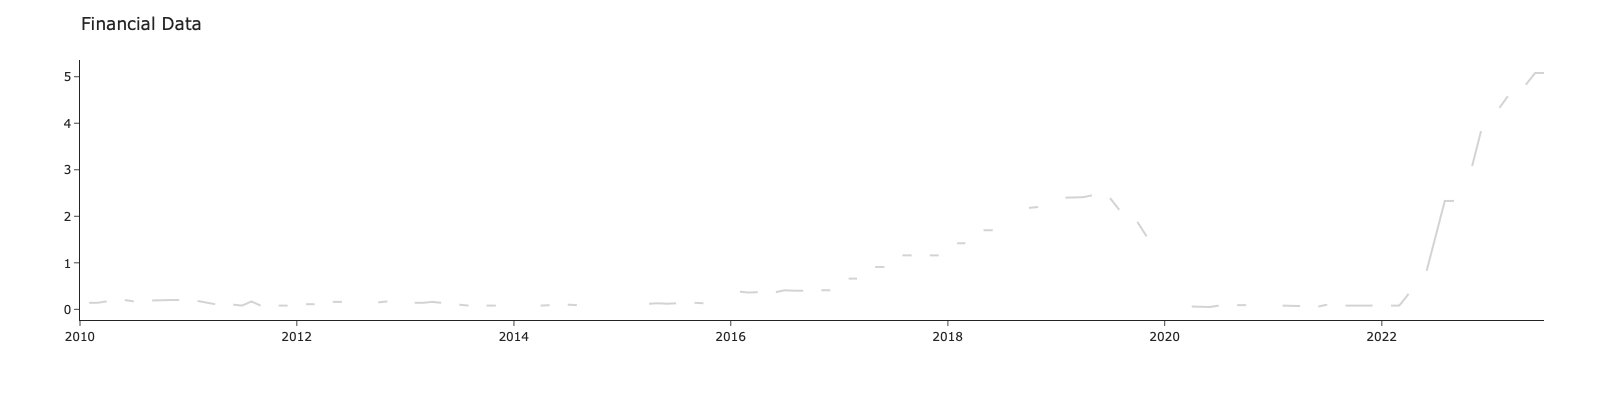

In [151]:
fig = px.line(height=400)
fig.add_scatter(y=df['EFFR'], x=df.index,
                marker=dict(size=20, color="lightgray"), name='actual')
fig.update_layout(template="simple_white", title="Financial Data")
fig.show()

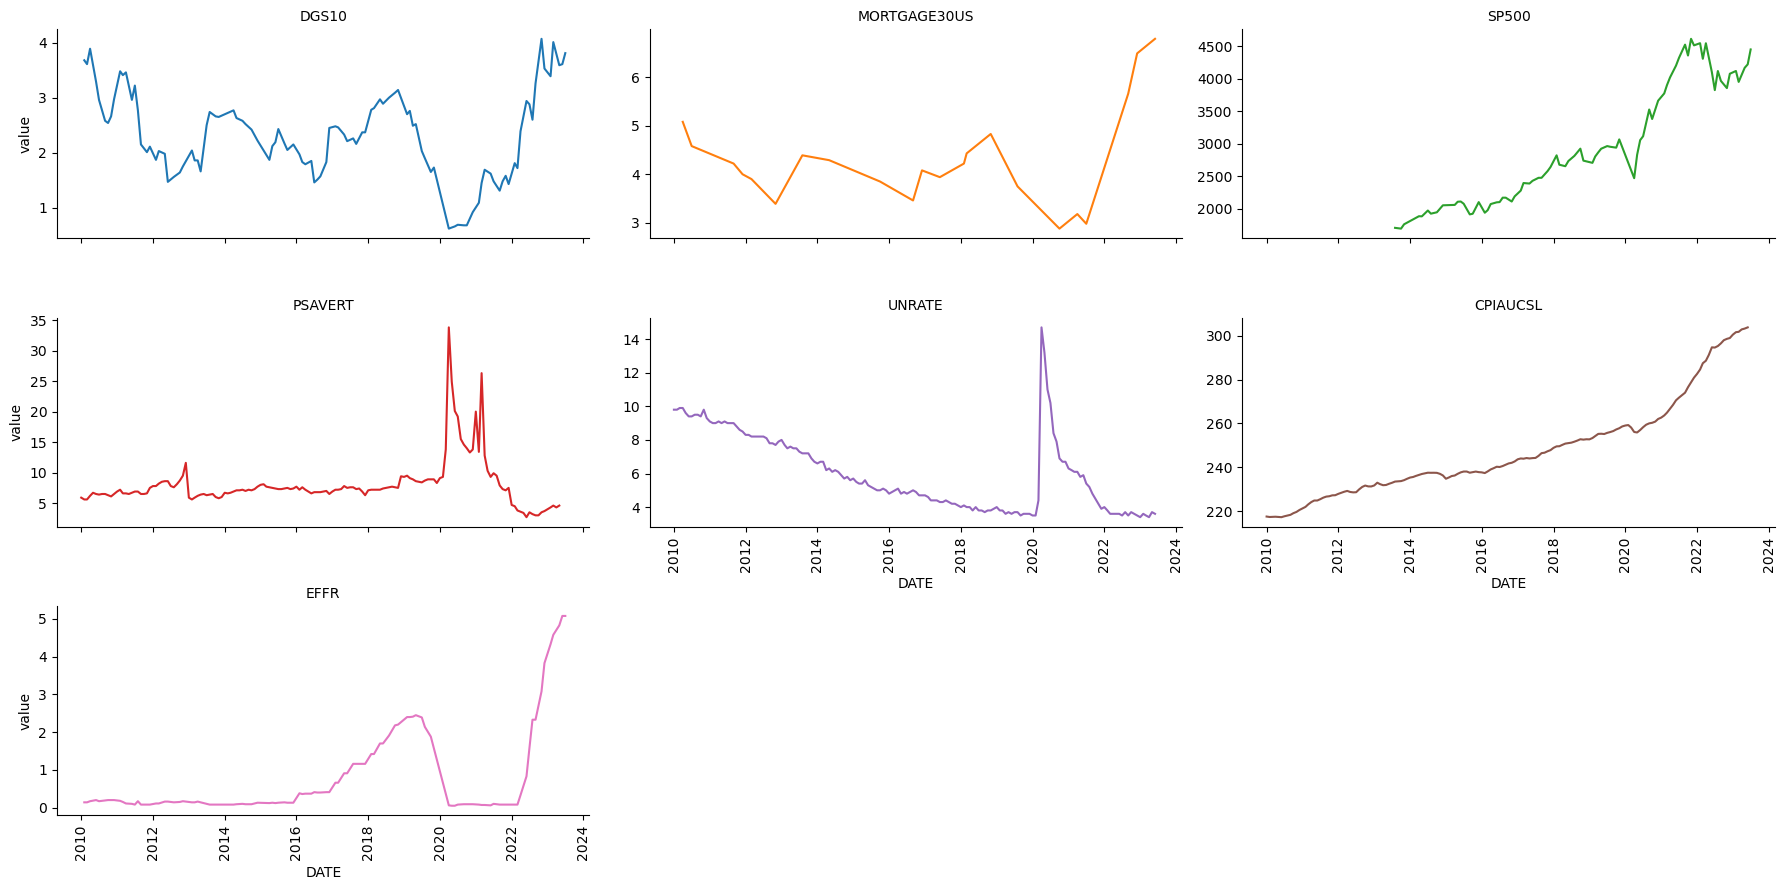

In [152]:
long_df = df.copy()
long_df.reset_index(inplace=True)

long_df = long_df.melt(id_vars=['DATE'])


# Graph
g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=2,col_wrap=3, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.tight_layout()
g.map_dataframe(sns.lineplot, y="value", x="DATE")

plt.show()

## Fill Data

In [153]:
df = df.resample('MS').max()
df.asfreq('1M')
#df = df.asfreq(freq='1D', how='start', method='ffill', fill_value=0)

df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df


,DGS10,MORTGAGE30US,SP500,PSAVERT,UNRATE,CPIAUCSL,EFFR
DATE,,,,,,,
2010-01-01,3.68,5.08,1706.87,5.9,9.8,217.488,0.14
2010-02-01,3.68,5.08,1706.87,5.6,9.8,217.281,0.14
2010-03-01,3.61,5.08,1706.87,5.6,9.9,217.353,0.14
2010-04-01,3.89,5.08,1706.87,6.2,9.9,217.403,0.17
2010-05-01,3.89,5.08,1706.87,6.7,9.6,217.290,0.17
...,...,...,...,...,...,...,...
2023-03-01,4.01,6.49,3951.39,4.6,3.5,301.808,4.58
2023-04-01,4.01,6.49,3951.39,4.3,3.4,302.918,4.58
2023-05-01,3.59,6.49,4167.87,4.6,3.7,303.294,4.83


In [154]:
df.isnull().sum() / len(df)

DGS10           0.0
MORTGAGE30US    0.0
SP500           0.0
PSAVERT         0.0
UNRATE          0.0
CPIAUCSL        0.0
EFFR            0.0
dtype: float64

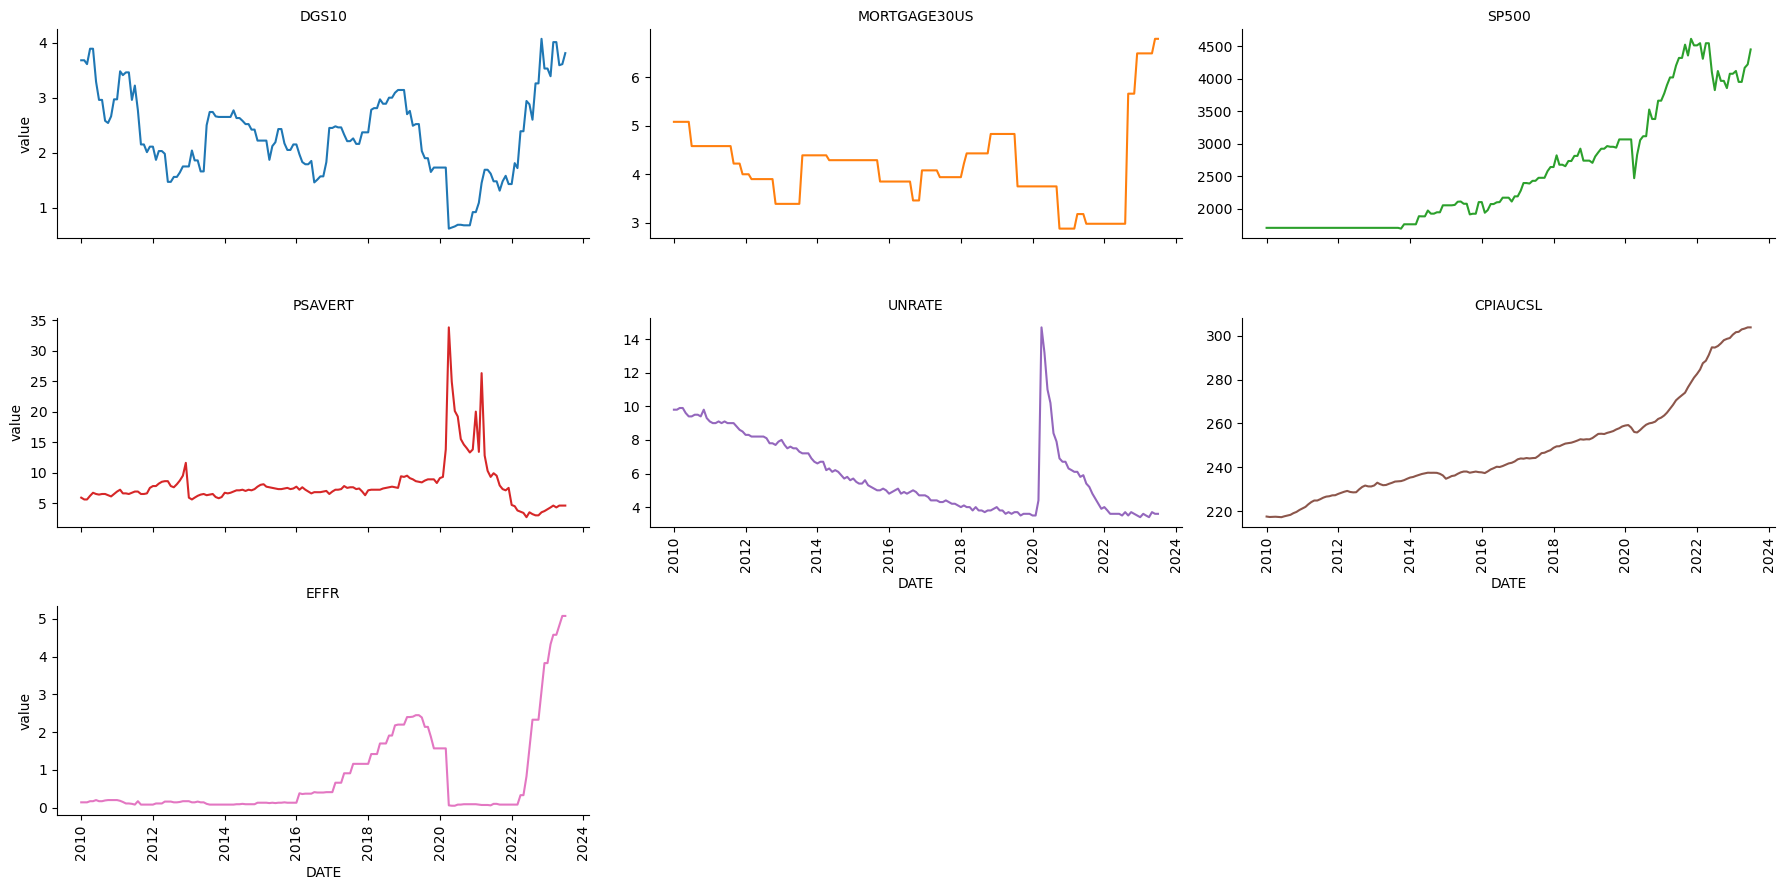

In [155]:
long_df = df.copy()
long_df.reset_index(inplace=True)

long_df = long_df.melt(id_vars=['DATE'])


# Graph
g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=2,col_wrap=3, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.tight_layout()
g.map_dataframe(sns.lineplot, y="value", x="DATE")

plt.show()

<Axes: >

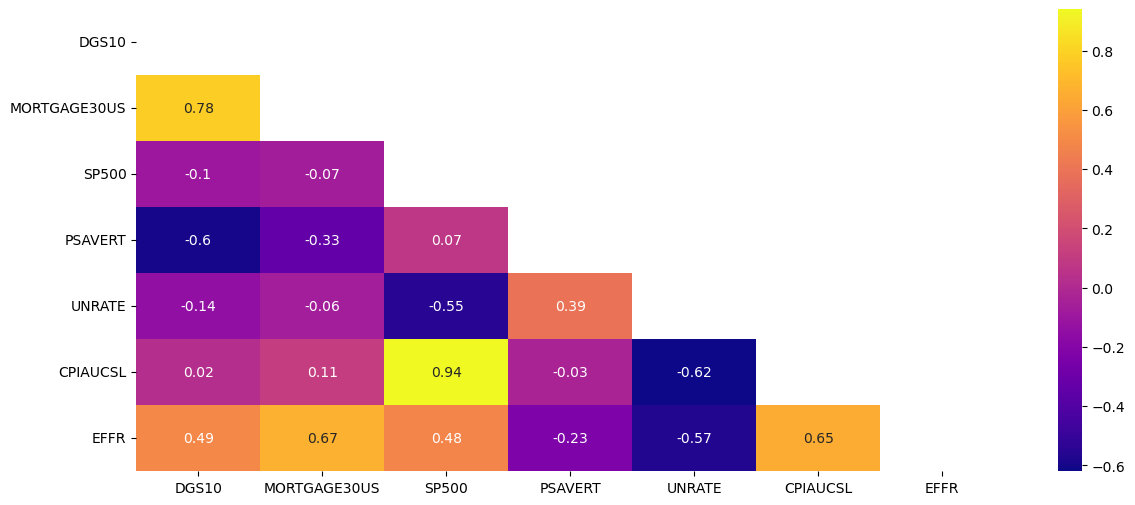

In [156]:
plt.figure(figsize=(14,6))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr().round(2), annot=True, mask=mask, cmap="plasma")

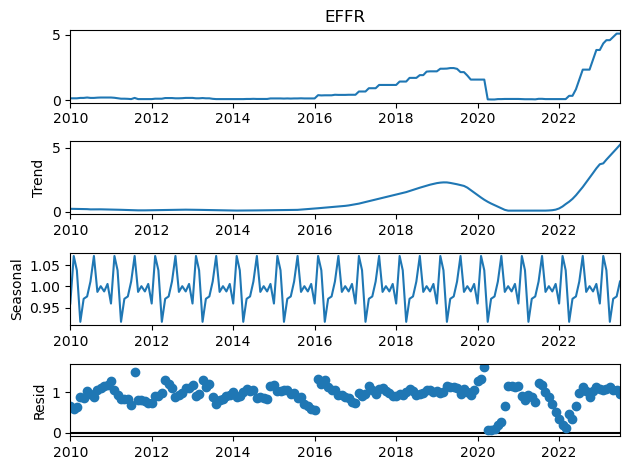

In [157]:
decomposition = sm.tsa.seasonal_decompose(df['EFFR'], model='multiplicative', 
                            extrapolate_trend='freq') #additive or multiplicative is data specific
fig = decomposition.plot()
plt.show()

# Test Train Split

## Train Data

In [158]:
splt_index = round(df.shape[0] * 0.8)
train_df = df[:splt_index].copy()
train_df = train_df.asfreq(freq='MS', how='start', method='ffill', fill_value=0)
train_df.fillna(method='ffill', inplace=True)

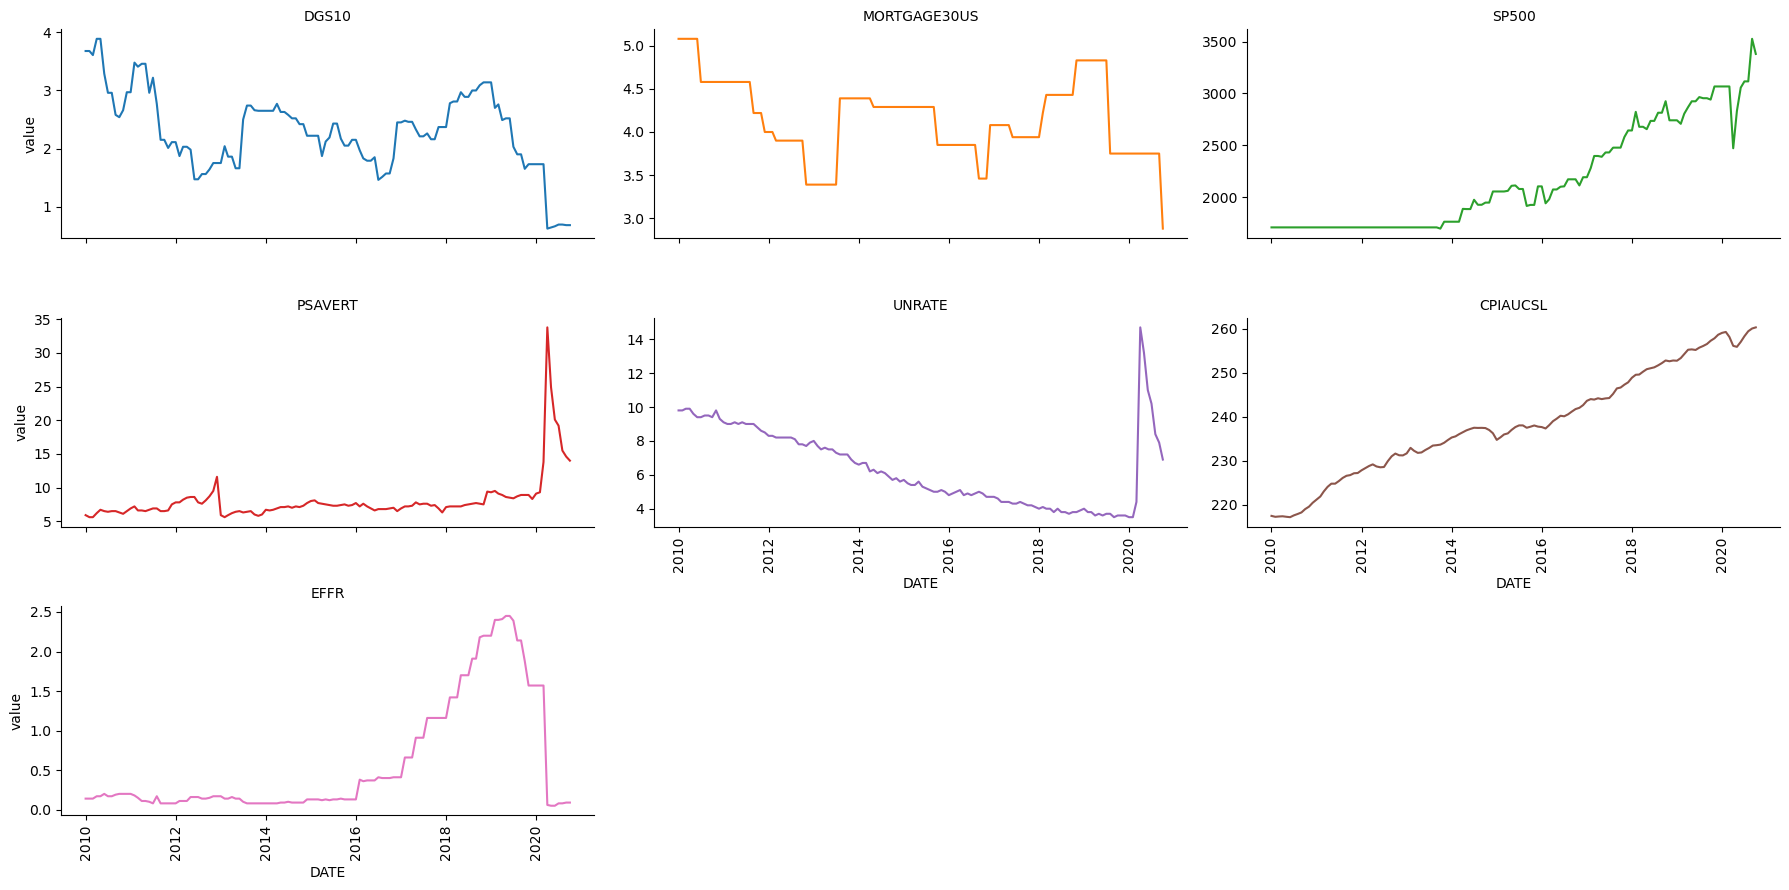

In [159]:
long_df = train_df.copy()
long_df.reset_index(inplace=True)

long_df = long_df.melt(id_vars=['DATE'])


# Graph
g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=2,col_wrap=3, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.tight_layout()
g.map_dataframe(sns.lineplot, y="value", x="DATE")

plt.show()

## Test Data

In [160]:
test_df = df[splt_index:].copy()
test_df = test_df.asfreq(freq='MS', how='start', method='ffill', fill_value=0)
test_df.fillna(method='ffill', inplace=True)

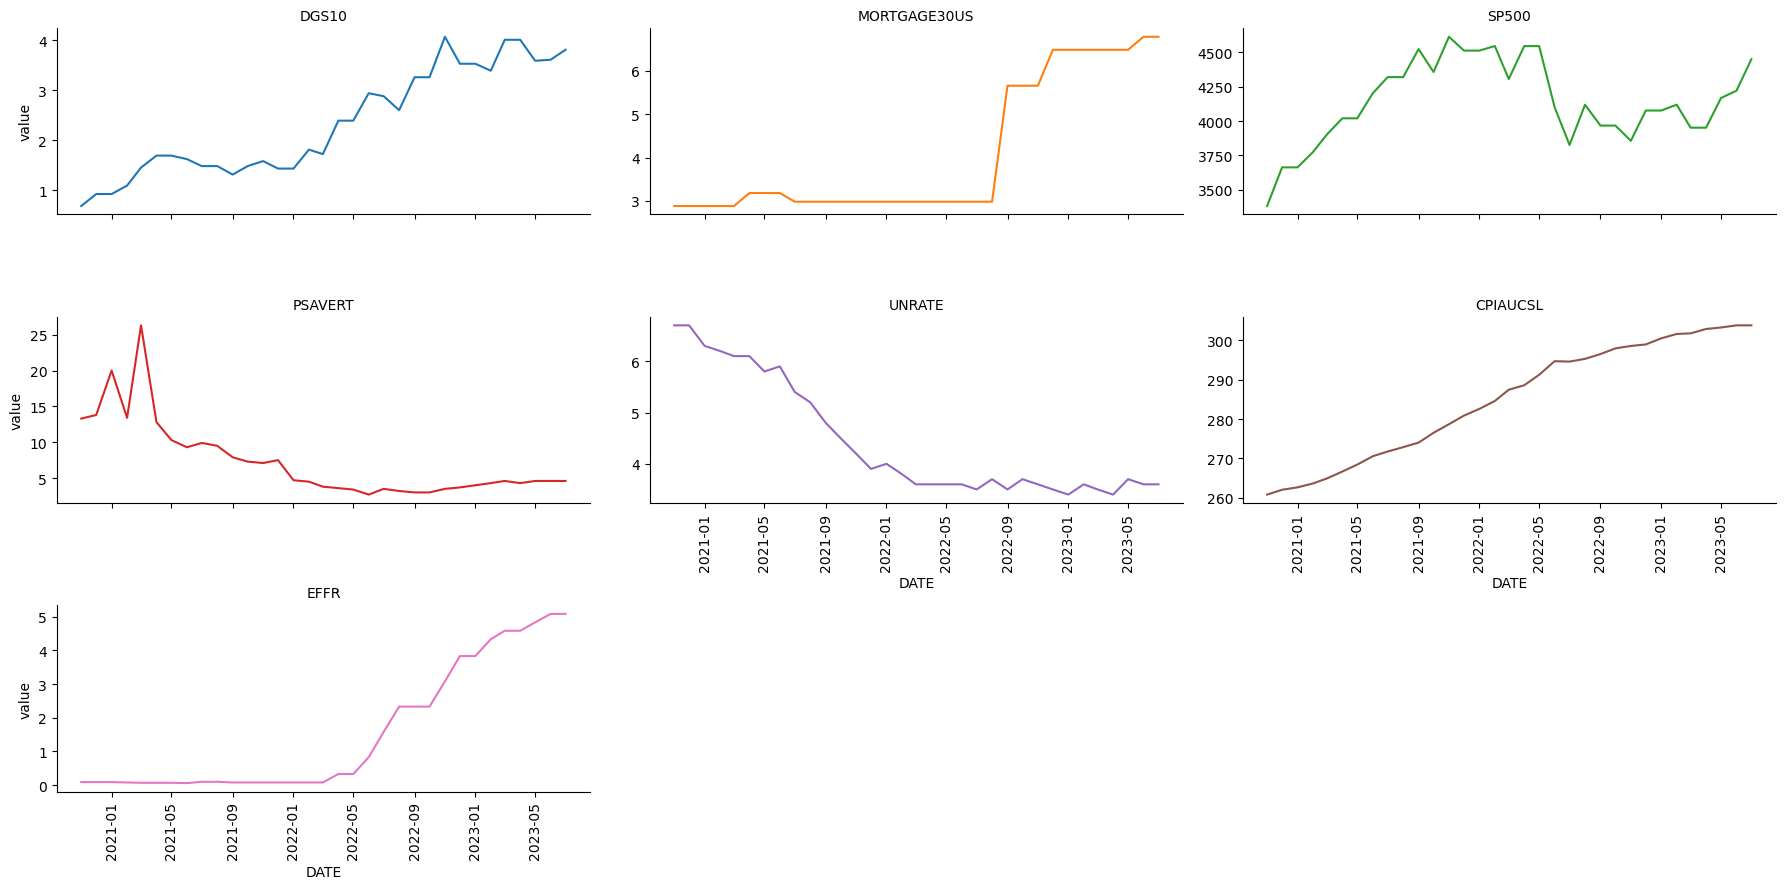

In [161]:
long_df = test_df.copy()
long_df.reset_index(inplace=True)

long_df = long_df.melt(id_vars=['DATE'])


# Graph
g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=2,col_wrap=3, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.tight_layout()
g.map_dataframe(sns.lineplot, y="value", x="DATE")

plt.show()

# tsa.SARIMAX

In [162]:
exog_lst = ['DGS10', 'MORTGAGE30US', 'SP500', 'PSAVERT', 'UNRATE', 'CPIAUCSL']

In [163]:
model = sm.tsa.SARIMAX(train_df['EFFR'], exog=train_df[exog_lst])

In [164]:
result_model = model.fit(disp=False)

In [165]:
print(result_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   EFFR   No. Observations:                  130
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 105.646
Date:                Tue, 25 Jul 2023   AIC                           -195.293
Time:                        20:58:03   BIC                           -172.353
Sample:                    01-01-2010   HQIC                          -185.972
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
DGS10            0.2603      0.034      7.628      0.000       0.193       0.327
MORTGAGE30US     0.1696      0.040      4.291      0.000       0.092       0.247
SP500        -2.164e-05      0.000     -0.15

# Training Predict 

In [166]:
train_result = result_model.get_prediction(start=-len(train_df), dynamic=True)

In [167]:
train_pred = train_result.summary_frame()
train_pred

EFFR,mean,mean_se,mean_ci_lower,mean_ci_upper
DATE,,,,
2010-01-01,0.561410,0.331865,-0.089033,1.211854
2010-02-01,0.556502,0.331865,-0.093942,1.206946
2010-03-01,0.523983,0.331865,-0.126461,1.174426
2010-04-01,0.606529,0.331865,-0.043915,1.256972
2010-05-01,0.657511,0.331865,0.007067,1.307955
...,...,...,...,...
2020-06-01,-0.406956,0.331865,-1.057400,0.243488
2020-07-01,-0.299760,0.331865,-0.950204,0.350684
2020-08-01,-0.100864,0.331865,-0.751307,0.549580


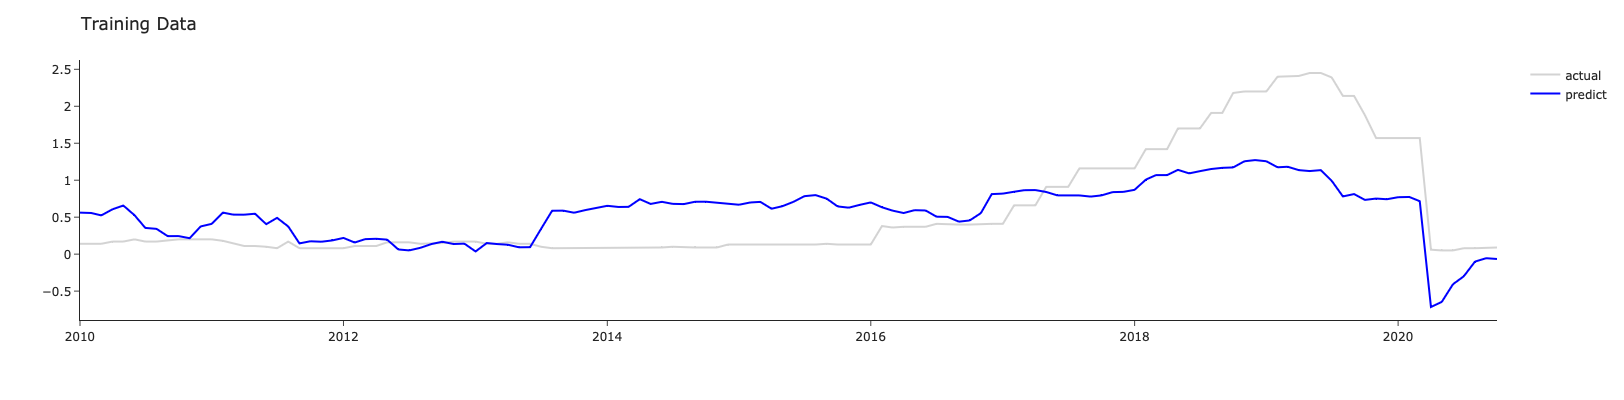

In [168]:
fig = px.line(height=400)
fig.add_scatter(y=train_df['EFFR'], x=train_df.index,
                marker=dict(size=20, color="lightgray"), name='actual')
fig.add_scatter(y=train_pred['mean'], x=train_pred.index,
                marker=dict(size=20, color="blue"), name='predict')
fig.update_layout(template="simple_white", title="Training Data")
fig.show()

## Testing Predictions

In [169]:
s_idx = len(train_df)
e_idx = s_idx + len(test_df) - 1

In [170]:
test_result = result_model.get_prediction(start=s_idx, end=e_idx, exog=test_df[exog_lst], dynamic=True)

In [171]:
test_pred = test_result.summary_frame()
test_pred

EFFR,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-11-01,0.099482,0.105913,-0.108104,0.307067
2020-12-01,0.156679,0.145920,-0.129318,0.442677
2021-01-01,0.306637,0.174188,-0.034765,0.648039
2021-02-01,0.250151,0.196134,-0.134265,0.634567
2021-03-01,0.556800,0.213935,0.137496,0.976104
2021-04-01,0.445005,0.228744,-0.003326,0.893336
2021-05-01,0.442620,0.241272,-0.030264,0.915504
2021-06-01,0.385322,0.251993,-0.108576,0.879220
2021-07-01,0.388903,0.261248,-0.123134,0.900939
2021-08-01,0.406562,0.269289,-0.121234,0.934359


In [173]:
predict_ci = test_result.conf_int(alpha=0.5)
predict_ci

,lower EFFR,upper EFFR
2020-11-01,0.028044,0.170919
2020-12-01,0.058258,0.255101
2021-01-01,0.189149,0.424125
2021-02-01,0.117860,0.382441
2021-03-01,0.412503,0.701096
2021-04-01,0.290719,0.599291
2021-05-01,0.279884,0.605355
2021-06-01,0.215355,0.555289
2021-07-01,0.212694,0.565112
2021-08-01,0.224930,0.588195


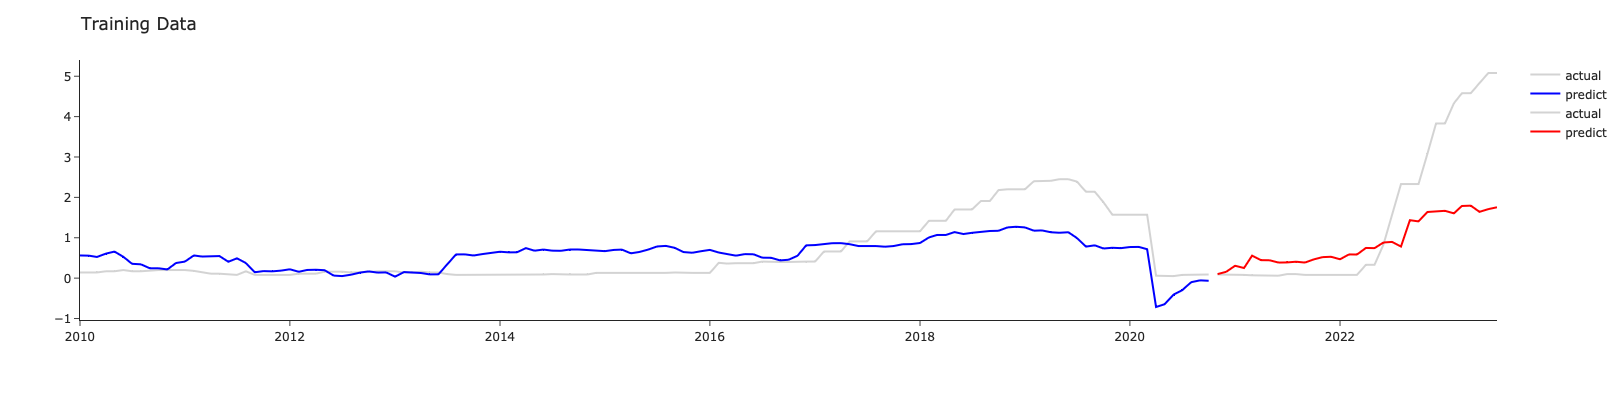

In [179]:
fig = px.line(height=400)
#fig, ax = plt.subplots(figsize=(12,6))

fig.add_scatter(y=train_df['EFFR'], x=train_df.index,
                marker=dict(size=20, color="lightgray"), name='actual')
fig.add_scatter(y=train_pred['mean'], x=train_pred.index,
                marker=dict(size=20, color="blue"), name='predict')
fig.add_scatter(y=test_df['EFFR'], x=test_df.index,
                marker=dict(size=20, color="lightgray"), name='actual')
fig.add_scatter(y=test_pred['mean'], x=test_pred.index,
                marker=dict(size=20, color="red"), name='predict')
#ax.fill_between(test_pred, predict_ci[:, 0], predict_ci[:, 1], alpha=0.15)
fig.update_layout(template="simple_white", title="Training Data")
fig.show()

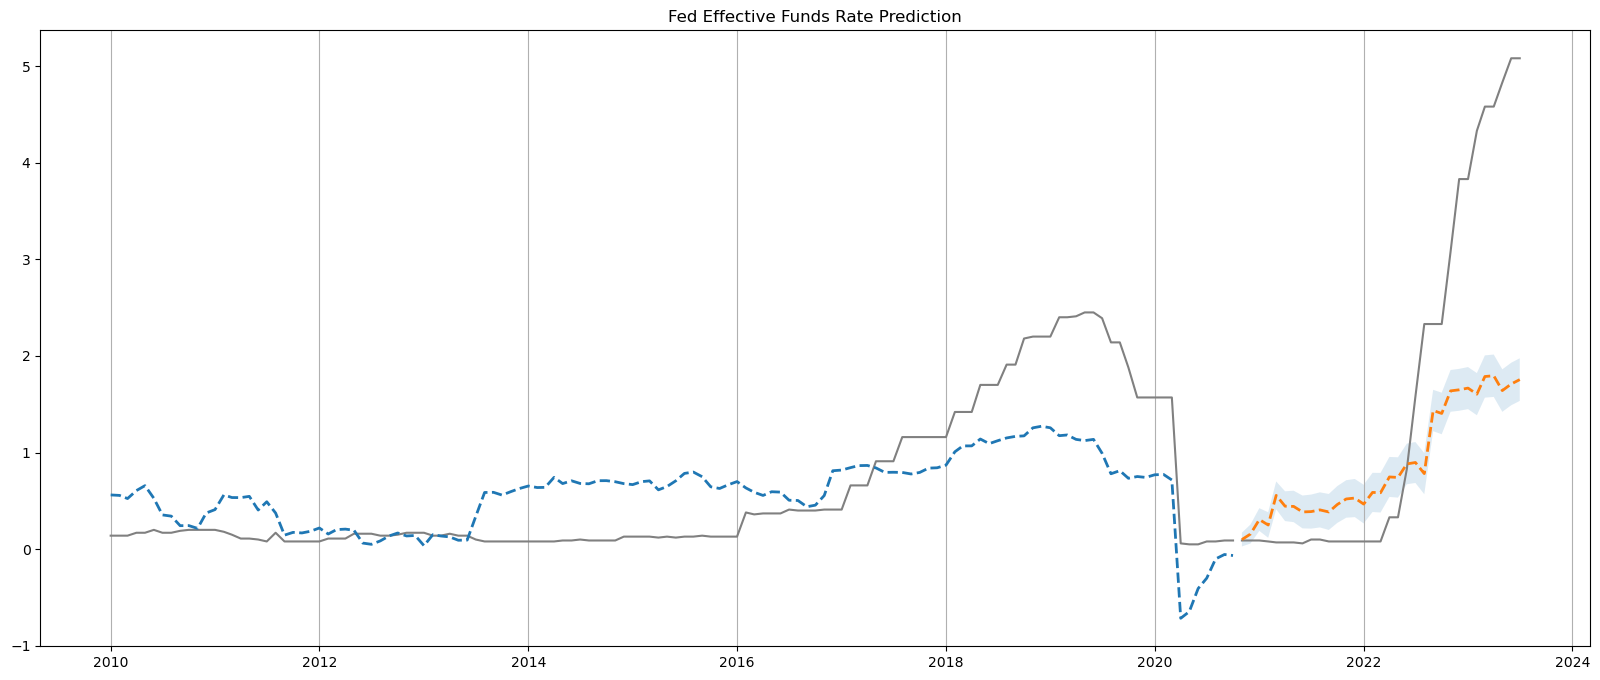

In [237]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(train_df.index, train_df['EFFR'], 'gray')
ax.plot(test_df.index, test_df['EFFR'], 'gray')
ax.plot(train_pred.index, train_pred['mean'], linestyle='--', linewidth=2)
ax.plot(test_pred.index, test_pred['mean'], linestyle='--', linewidth=2)
ax.fill_between(test_pred.index, predict_ci['lower EFFR'], predict_ci['upper EFFR'], alpha=0.15)

ax.set(title='Fed Effective Funds Rate Prediction');

# Stats Model

In [199]:
X_train = train_df.drop(['EFFR'], axis=1)
y_train = train_df['EFFR']

column_lst = X_train.columns
index_lst = X_train.index

In [200]:
X_train_sm = sm.add_constant(X_train)

In [201]:
ols_model = sm.OLS(y_train, X_train_sm)
ols_result = ols_model.fit()

In [205]:
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   EFFR   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     66.50
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.89e-36
Time:                        21:44:12   Log-Likelihood:                -51.353
No. Observations:                 130   AIC:                             116.7
Df Residuals:                     123   BIC:                             136.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.5891      3.092     -1.807   

In [208]:
ols_result.params

const          -5.589084
DGS10           0.267238
MORTGAGE30US    0.241882
SP500           0.000743
PSAVERT        -0.012445
UNRATE         -0.079349
CPIAUCSL        0.014880
dtype: float64

In [229]:
y_predicted = ols_result.predict(X_train_sm)
train_pred_df = pd.DataFrame(y_predicted)
train_pred_df.columns = ['EFFR_PRED']
train_pred_df.index = y_train.index   
train_pred_df

,EFFR_PRED
DATE,
2010-01-01,0.276661
2010-02-01,0.277314
2010-03-01,0.251744
2010-04-01,0.319848
2010-05-01,0.335748
...,...
2020-06-01,0.465995
2020-07-01,0.612598
2020-08-01,0.818332


0.6917255390712557


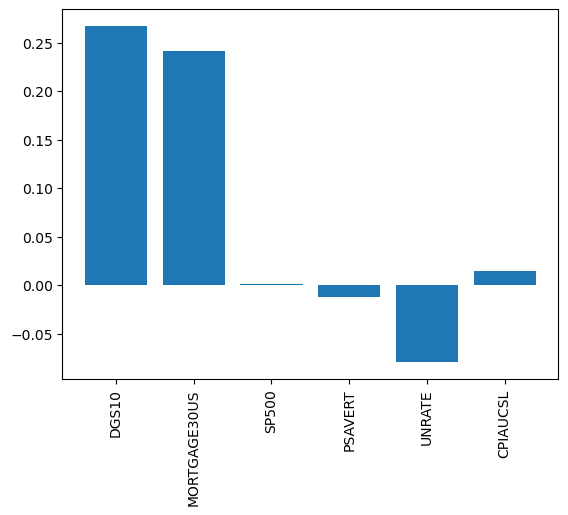

In [230]:
fig, ax = plt.subplots()
print(r2_score(y_predicted, y_train))
plt.bar(column_lst, ols_result.params[1:])
plt.xticks(rotation=90)
plt.show()

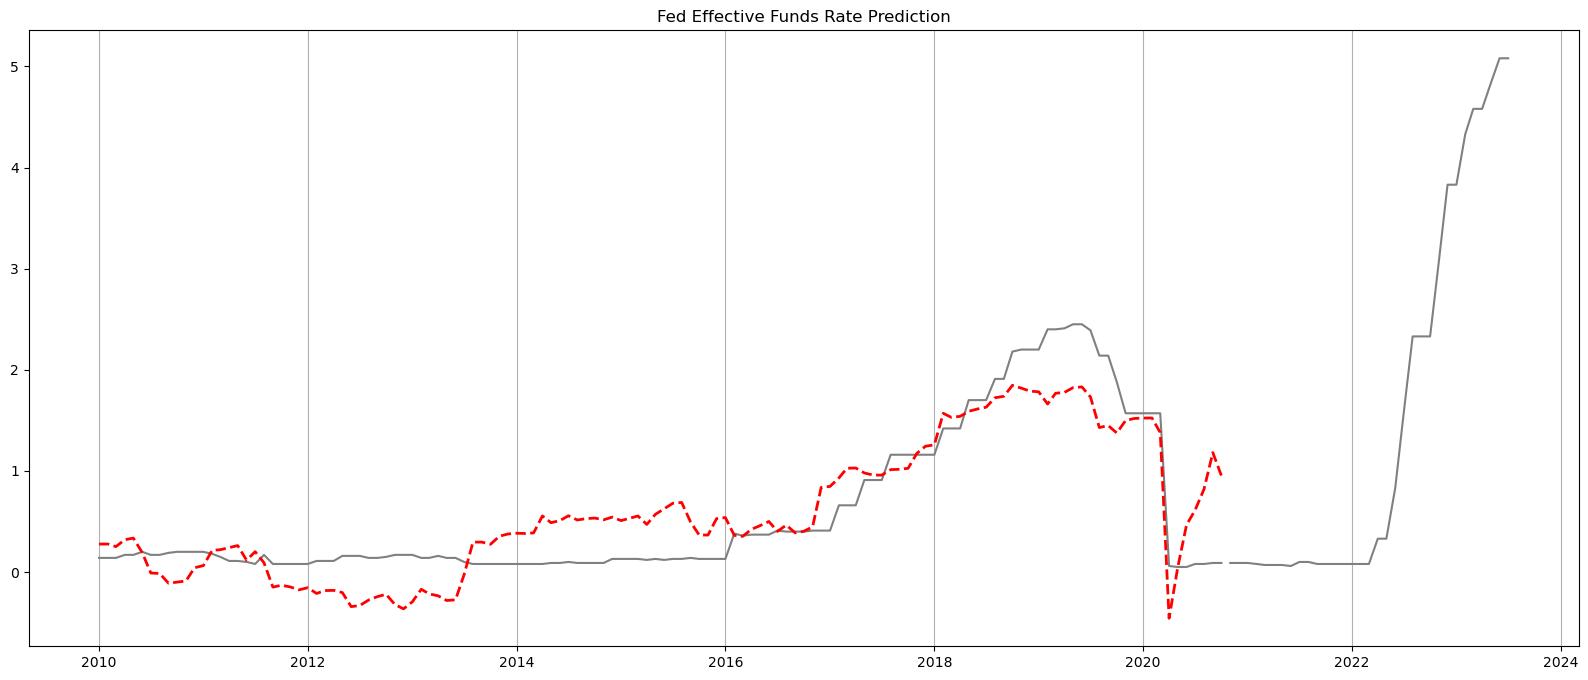

In [231]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(train_df.index, train_df['EFFR'], 'gray')
ax.plot(test_df.index, test_df['EFFR'], 'gray')
ax.plot(train_pred_df.index, test_pred_df['EFFR_PRED'], linestyle='--', color='red', linewidth=2)
#ax.fill_between(test_pred.index, predict_ci['lower EFFR'], predict_ci['upper EFFR'], alpha=0.15)

ax.set(title='Fed Effective Funds Rate Prediction');

## Training

In [233]:
X_test = test_df.drop(['EFFR'], axis=1)
y_test = test_df['EFFR']

column_lst = X_test.columns
index_lst = X_test.index

In [234]:
X_test_sm = sm.add_constant(X_test)

In [235]:
y_predicted = ols_result.predict(X_test_sm)
test_pred_df = pd.DataFrame(y_predicted)
test_pred_df.columns = ['EFFR_PRED']
test_pred_df.index = y_test.index   
test_pred_df

,EFFR_PRED
DATE,
2020-11-01,0.985225
2020-12-01,1.270608
2021-01-01,1.234339
2021-02-01,1.467329
2021-03-01,1.524998
2021-04-01,1.943558
2021-05-01,2.024873
2021-06-01,2.177513
2021-07-01,2.229469


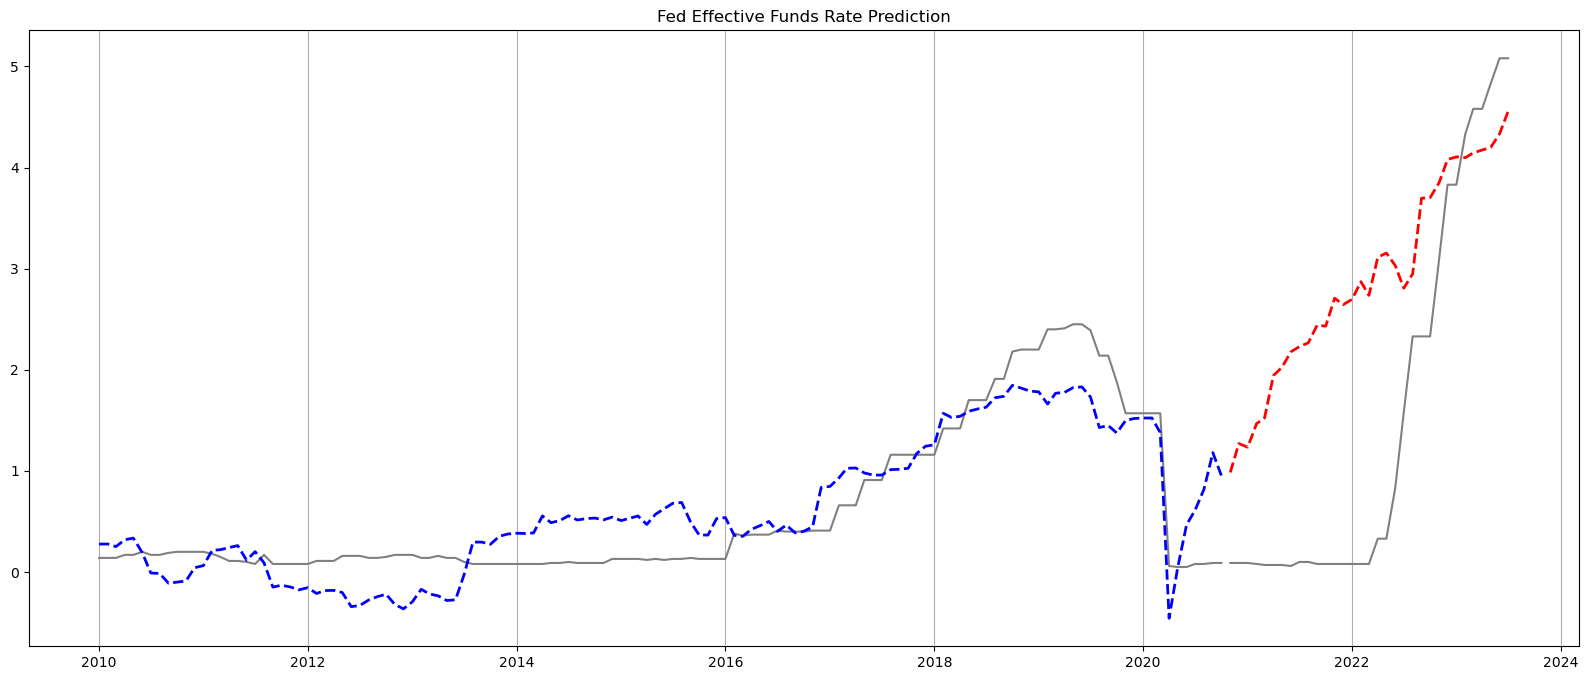

In [236]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(train_df.index, train_df['EFFR'], 'gray')
ax.plot(test_df.index, test_df['EFFR'], 'gray')
ax.plot(train_pred_df.index, train_pred_df['EFFR_PRED'], linestyle='--', color='blue', linewidth=2)
ax.plot(test_pred_df.index, test_pred_df['EFFR_PRED'], linestyle='--', color='red', linewidth=2)
#ax.fill_between(test_pred.index, predict_ci['lower EFFR'], predict_ci['upper EFFR'], alpha=0.15)

ax.set(title='Fed Effective Funds Rate Prediction');